In [4]:
package variation1{
      

    part def Sensors{
      
    }
    part def Camera{
      
    }

    part sensors : Sensors[1..*];
    part camera : Camera[2];
    
     part def SolarPanels{
      
    }
    part def Fuelcells{
      
    }
    part solarPanels : SolarPanels[6];
    part fuelcells : Fuelcells[2];
    
        }

Package variation1 (691c9556-f239-4dfe-89a8-58e014325982)


In [5]:
package 'VariationDefinitions' {
    import ScalarValues::Real;
    import SI::kg;
    import variation1::*;
    // Payload Choices
  variation  part def PayloadChoices {
        variant sensors;
        variant camera;
    }
    // Power System Choices
    variation part def PowerSystemChoices {
        variant solarPanels;
        variant fuelcells;
    }
}



Package VariationDefinitions (7624d9a2-5847-4a2d-adce-668687f43746)


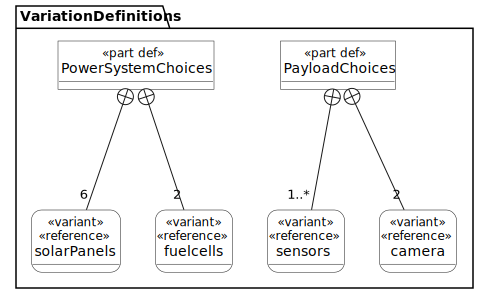

In [6]:
%viz VariationDefinitions 

In [7]:
package 'VariationUsages' {
    import 'VariationDefinitions'::*;
    part def HighAltitudePlatform;
    abstract part HAP : HighAltitudePlatform {
        part payload : PayloadChoices[1];
        part powerSystem : PowerSystemChoices[1];
        // Constraints to ensure valid configurations
        assert constraint {
            (payload == PayloadChoices::sensors and
             powerSystem == PowerSystemChoices::solarPanels) xor
            (payload == PayloadChoices::camera and
             powerSystem == PowerSystemChoices::fuelcells)
        }
    }
}



Package VariationUsages (cd5c2e41-beeb-45b0-9b13-75812de2c620)


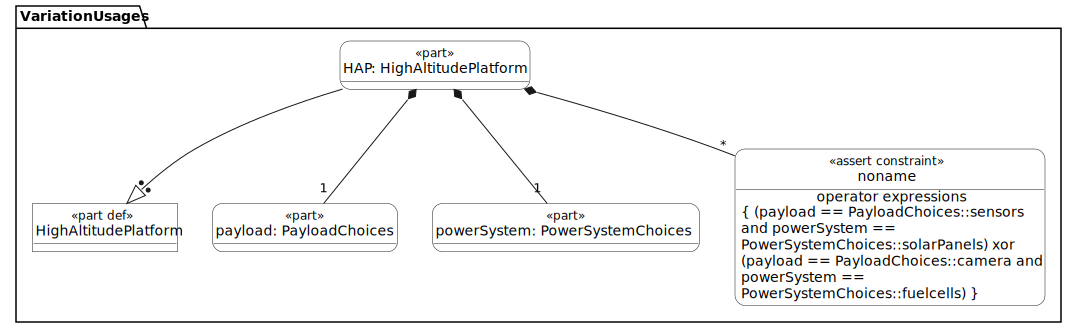

In [8]:
%viz VariationUsages

In [9]:
package 'VariationConfiguration' {
    import 'VariationUsages'::*;
    // Short-Duration HAP Configuration
    part shortDurationHAP :> HAP {
        part redefines payload = PayloadChoices::sensors;
        part redefines powerSystem = PowerSystemChoices::solarPanels;
    }
    // Long-Duration HAP Configuration
    part longDurationHAP :> HAP {
        part redefines payload = PayloadChoices::camera;
        part redefines powerSystem = PowerSystemChoices::fuelcells;
       
    }
}

Package VariationConfiguration (2e8c869c-1fbc-44db-8bba-cbea4cd99149)


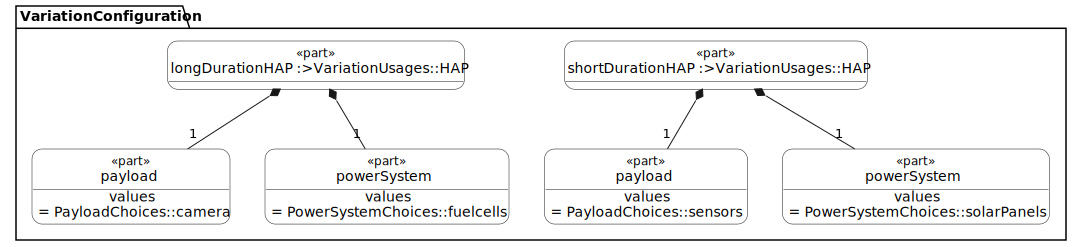

In [10]:
%viz VariationConfiguration